# Indonesian Movies EDA

Exploratory Data Analysis for `indonesian_movies.csv` using.


In [24]:
# 1.1 Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import numpy as np

In [25]:
# 1.2 Load dataset
df = pd.read_csv('indonesian_movies.csv')

df

,title,year,description,genre,rating,users_rating,votes,languages,directors,actors,runtime
0,#FriendButMarried 2,2020,Ayudia (Mawar De Jongh) is not satisfied enoug...,Biography,13+,6.5,120,Indonesian,Rako Prijanto,"['Adipati Dolken', 'Mawar Eva de Jongh', 'Vonn...",100 min
1,4 Mantan,2020,"Sara, Airin, Rachel, and Amara were accidental...",Thriller,17+,6.4,8,Indonesian,Hanny Saputra,"['Ranty Maria', 'Jeff Smith', 'Melanie Berentz...",80 min
2,Aku Tahu Kapan Kamu Mati,2020,"After apparent death, Siena is able to see sig...",Horror,13+,5.4,17,Indonesian,Hadrah Daeng Ratu,"['Natasha Wilona', 'Ria Ricis', 'Al Ghazali', ...",92 min
3,Anak Garuda,2020,"Good Morning Indonesia, a school for poor orph...",Adventure,13+,9.1,27,Indonesian,Faozan Rizal,"['Tissa Biani Azzahra', 'Violla Georgie', 'Aji...",129 min
4,Dignitate,2020,Alfi (Al Ghazali) meets Alana (Caitlin Halderm...,Drama,17+,7.6,33,Indonesian,Fajar Nugros,"['Al Ghazali', 'Caitlin Halderman', 'Giorgino ...",109 min
...,...,...,...,...,...,...,...,...,...,...,...
1267,The Tiger from Tjampa,1953,"Set in the 1930s, and narrated like a ballad f...",Drama,NaN,6.4,30,Indonesian,D. Djajakusuma,"['Wahid Chan', 'Bambang Hermanto', 'R.D. Ismai...",97 min
1268,Enam Djam di Djogja,1951,Depicting the celebrated recapture of the town...,Drama,NaN,6.3,9,Indonesian,Usmar Ismail,"['R.D. Ismail', 'Del Juzar', 'Aedy Moward', 'A...",116 min
1269,Darah dan Doa,1950,It tells the story of an Indonesian revolution...,Drama,NaN,6.6,27,Indonesian,Usmar Ismail,"['Ella Bergen', 'Faridah', 'R.D. Ismail', 'Del...",150 min
1270,Resia Boroboedoer,1928,NaN,Adventure,NaN,7.0,8,Indonesian,NaN,"['Olive Young', nan, nan, nan, nan, nan, nan, ...",NaN


In [26]:
# 1.3 Check dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272 entries, 0 to 1271
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         1272 non-null   object 
 1   year          1272 non-null   int64  
 2   description   840 non-null    object 
 3   genre         1236 non-null   object 
 4   rating        376 non-null    object 
 5   users_rating  1272 non-null   float64
 6   votes         1272 non-null   object 
 7   languages     1272 non-null   object 
 8   directors     1265 non-null   object 
 9   actors        1272 non-null   object 
 10  runtime       869 non-null    object 
dtypes: float64(1), int64(1), object(9)
memory usage: 109.4+ KB


In [27]:
# 1.4 Check unique columns

for col in df.columns:
    print(f"\nUnique values in '{col}':\n{df[col].unique()}")


Unique values in 'title':
['#FriendButMarried 2' '4 Mantan' 'Aku Tahu Kapan Kamu Mati' ...
 'Darah dan Doa' 'Resia Boroboedoer' 'Loetoeng Kasaroeng']

Unique values in 'year':
[2020 2019 2018 2017 2016 2015 2014 2013 2012 2011 2010 2009 2008 2007
 2006 2005 2004 2003 2002 2001 2000 1999 1998 1997 1996 1995 1994 1993
 1992 1991 1990 1989 1988 1987 1986 1985 1984 1983 1982 1981 1980 1979
 1978 1977 1976 1975 1974 1973 1972 1971 1970 1962 1961 1958 1956 1955
 1954 1953 1951 1950 1928 1926]

Unique values in 'description':
['Ayudia (Mawar De Jongh) is not satisfied enough in enjoying the moment as a wife, but she suddenly becomes pregnant. Her personality changes completely and becomes lazy and super sensitive.'
 'Sara, Airin, Rachel, and Amara were accidentally brought together after the death of their ex, Alex. All four received a letter saying that there was one killer among them.'
 'After apparent death, Siena is able to see signs that people will die. However, her friends did not bel


Unique values in 'actors':
["['Adipati Dolken', 'Mawar Eva de Jongh', 'Vonny Cornellya', 'Sari Nila', 'Ivan Leonardy', 'Clay Gribble', 'Sarah Sechan', 'Jourdy Pranata', 'Tubagus Ali', 'Ravil Prasetya', 'Nagra Kautsar Pakusadewo', 'Canti Tachril', 'Thalia Basir', 'Sp Lili', 'Anna Tairas']"
 "['Ranty Maria', 'Jeff Smith', 'Melanie Berentz', 'Denira Wiraguna', 'Melayu Nicole', 'Cinta Brian', 'Delano Daniel', 'Denny Weller', 'Mario Wiericx', 'Wani Siregar', 'Gary M. Iskak', 'Akja Dethan', 'Ayu Dyah Pasha', nan, nan]"
 "['Natasha Wilona', 'Ria Ricis', 'Al Ghazali', 'Fitria Rasyidi', 'Ryma Karimah', 'Sonia Alexa', 'Asri Welas', 'Cathrine Wilson', 'Opie Kumis', 'Adinda Halona', 'Elizabeth Christine', 'Daus Separo', 'Rita Nurmaliza', 'Anastasia Adamova', nan]"
 ...
 "['Ella Bergen', 'Faridah', 'R.D. Ismail', 'Del Juzar', 'Aedy Moward', 'A. Rachman', 'Suzzanna', nan, nan, nan, nan, nan, nan, nan, nan]"
 "['Olive Young', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]"
 "[

In [28]:
df.describe()

,year,users_rating
count,1272.000000,1272.000000
mean,2007.023585,6.144418
std,12.968560,1.389315
min,1926.000000,1.200000
25%,2006.000000,5.300000
50%,2011.000000,6.400000
75%,2016.000000,7.100000
max,2020.000000,9.400000


## Preprocessing Data

In [29]:
# 2.1 Preprocessing Data

## Drop duplicates data

df = df.drop_duplicates()

In [30]:
## Check Missing Value

df.isnull().sum()

# There are NaN data rows in the description, genre, rating, votes, director, and runtime columns.
# Drop Missing Value
# df = df.dropna(subset=['description', 'genre', 'rating', 'votes', 'directors', 'runtime'])

title             0
year              0
description     432
genre            36
rating          896
users_rating      0
votes             0
languages         0
directors         7
actors            0
runtime         403
dtype: int64

### Data Transformation

In [31]:
# 2.2 Data Transformation

# 2.2.1

df['runtime'] = df['runtime'].str.replace(' min', '')

df['actors'] = df['actors'].str.replace(', nan', '')

In [32]:
# 2.2.2 

df['year'] = df['year'].astype(int, errors='ignore')
df['votes'] = pd.to_numeric(df['votes'], errors='coerce')
df['users_rating'] = pd.to_numeric(df['users_rating'], errors='coerce')
df['runtime'] = pd.to_numeric(df['runtime'], errors='coerce')

In [33]:
# 2.2.3 Mapping runtime categories

def categorize_runtime(runtime):
    if runtime < 60:
        return '<60 minutes'
    elif 60 <= runtime < 70:
        return '60-70 minutes'
    elif 70 <= runtime < 80:
        return '70-80 minutes'
    elif 80 <= runtime < 90:
        return '80-90 minutes'
    elif 90 <= runtime < 100:
        return '90-100 minutes'
    elif 100 <= runtime < 110:
        return '100-110 minutes'
    elif 110 <= runtime < 120:
        return '110-120 minutes'
    else:
        return '>120 minutes'

df['runtime_category'] = df['runtime'].apply(categorize_runtime)

In [34]:
# 2.2.4 Mapping votes categories

def categorize_votes(votes):
    if votes < 100:
        return '<100'
    elif 100 <= votes < 200:
        return '100-200'
    elif 200 <= votes < 300:
        return '200-300'
    elif 300 <= votes < 400:
        return '300-400'
    elif 400 <= votes < 500:
        return '400-500'
    elif 500 <= votes < 600:
        return '500-600'
    elif 600 <= votes < 700:
        return '600-700'
    elif 700 <= votes < 800:
        return '700-800'
    elif 700 <= votes < 800:
        return '600-700'
    else:
        return '>900'

df['votes_category'] = df['votes'].apply(categorize_votes)

In [35]:
# 2.2.5 Mapping ages rating categories

rating_mapping = {
    '13+': 'R13+',
    'PG-13 rating': 'R13+',
    'TV-14': 'R13+',
    '17+': 'D17+',
    'R': 'D17+',
    'TV-MA': 'D17+',
    '21+': 'D21+',
    'D': 'D21+',
    'SU': 'SU',
    'Not Ranted': pd.NA,
    'Unrated': pd.NA
}

df['rating'] = df['rating'].map(rating_mapping)

In [36]:
df.describe()

,year,users_rating,votes,runtime
count,1272.000000,1272.000000,1232.000000,869.000000
mean,2007.023585,6.144418,75.844156,97.069045
std,12.968560,1.389315,131.234413,16.120795
min,1926.000000,1.200000,5.000000,45.000000
25%,2006.000000,5.300000,12.000000,88.000000
50%,2011.000000,6.400000,25.000000,95.000000
75%,2016.000000,7.100000,67.000000,105.000000
max,2020.000000,9.400000,981.000000,262.000000


## Exploratory Data Analysis

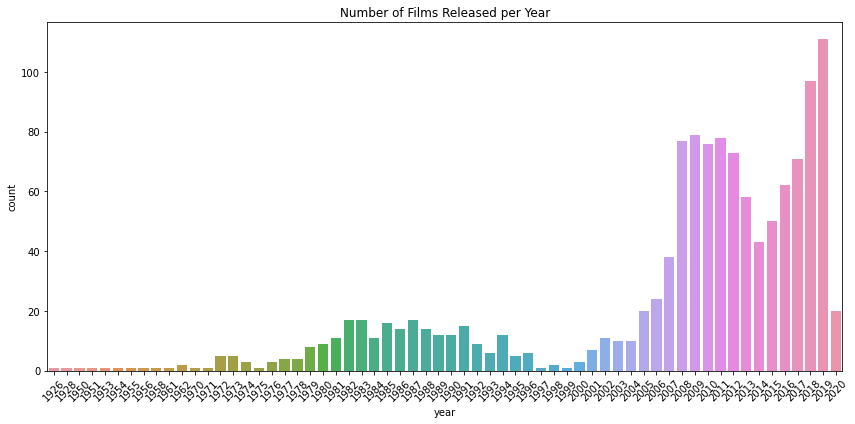

In [37]:
# 3.1 Film Distribution per Year
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='year', order=sorted(df['year'].unique()))
plt.title('Number of Films Released per Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

---

### (3.1) Number of Films Released per Year
From this dataset, it can be seen that Indonesian film production has increased significantly since the early 2000s, reaching a peak between 2018 and 2020. This indicates the rapid growth of the film industry in the last two decades.

---

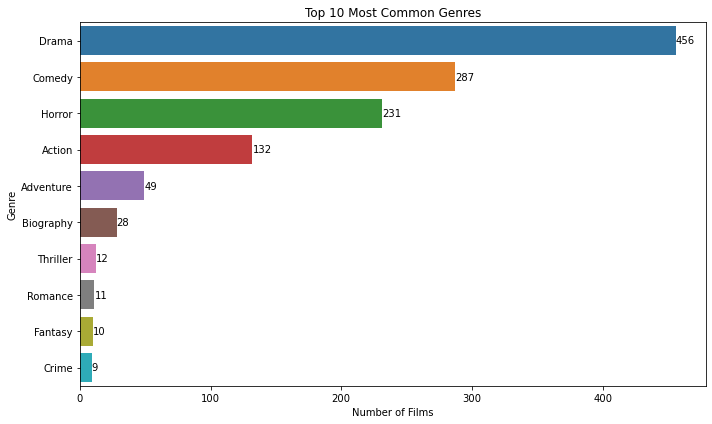

In [38]:
# 3.2 Distribution of film genres
df_genres = df['genre'].dropna().str.split(',').explode().str.strip()
top_genres = df_genres.value_counts().head(10)

plt.figure(figsize=(10,6))
ax = sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title('Top 10 Most Common Genres')
plt.xlabel('Number of Films')
plt.ylabel('Genre')
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 0.1, p.get_y() + p.get_height()/2.,
            '{:.0f}'.format(width),
            ha="left", va="center")
plt.tight_layout()
plt.show()

---

### (3.2) Top 10 Most Common Genres
The most common genre is **Drama**, followed by **Comedy** and **Romance**. This shows the industry's strong preference for genres that highlight emotional conflict and human relationships.

---

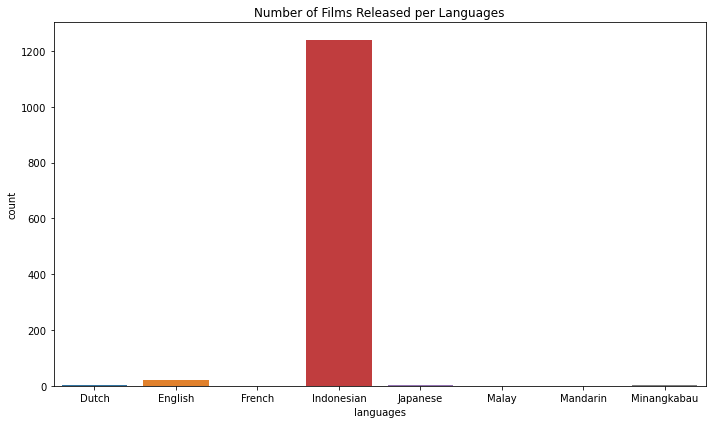

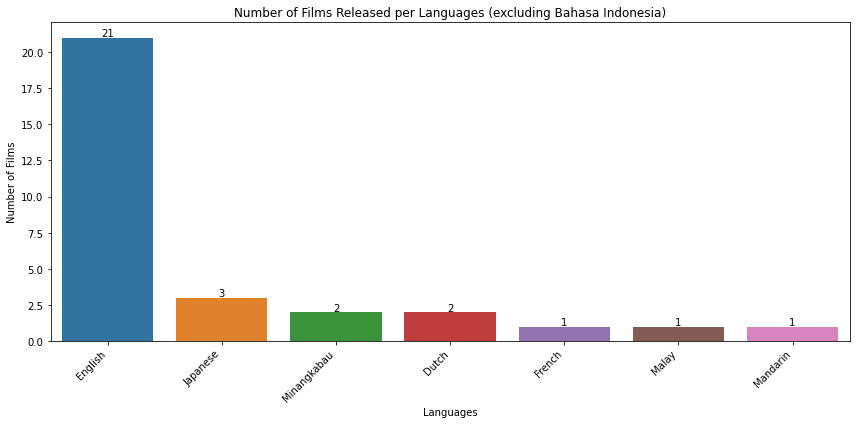

In [39]:
# 3.3 Distribution of languages used in the film

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='languages', order=sorted(df['languages'].dropna().unique()))
plt.title('Number of Films Released per Languages')
plt.tight_layout()
plt.show()

# 3.3.1 
df_filtered = df[df['languages'] != 'Indonesian'].copy()

plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df_filtered, x='languages', order=df_filtered['languages'].value_counts().index)
plt.title('Number of Films Released per Languages (excluding Bahasa Indonesia)')
plt.xlabel('Languages')
plt.ylabel('Number of Films')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 0.1,
            '{:.0f}'.format(height),
            ha="center")

plt.show()

---

### (3.3) Number of Films Released per Languages
The majority of films use Indonesian. English and regional languages are used very little, indicating the dominance of national languages in local films.

---

### (3.3.1) Number of Films Released per Languages (Excluding Indonesian)
If Indonesian is excluded, English is the most widely used language, but the number is still very small compared to the total.

---

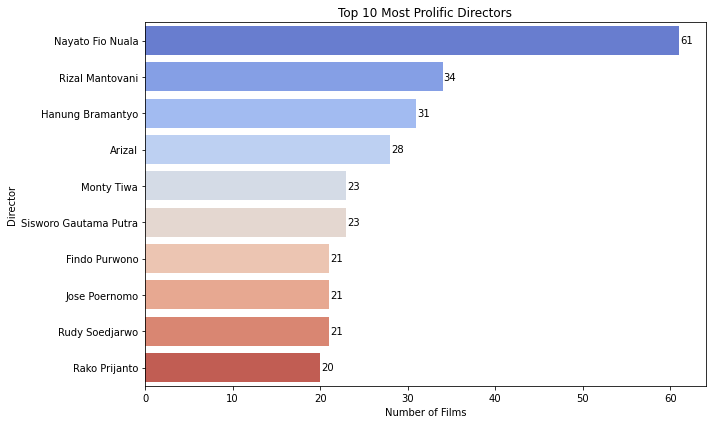

In [40]:
# 3.4 Director with the most films
df_directors = df['directors'].dropna().str.split(',').explode().str.strip()
top_directors = df_directors.value_counts().head(10)

plt.figure(figsize=(10,6))
ax = sns.barplot(x=top_directors.values, y=top_directors.index, palette="coolwarm")
plt.title('Top 10 Most Prolific Directors')
plt.xlabel('Number of Films')
plt.ylabel('Director')
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 0.1, p.get_y() + p.get_height()/2.,
            '{:.0f}'.format(width),
            ha="left", va="center")
plt.tight_layout()
plt.show()

---

### (3.4) Top 10 Most Prolific Directors
Nayato Fio Nuala, Rizal Mantovani, and Hanung Bramantyo are the two most prolific directors, each having directed more than 30 films. This shows their important role in shaping modern Indonesian cinema.

---

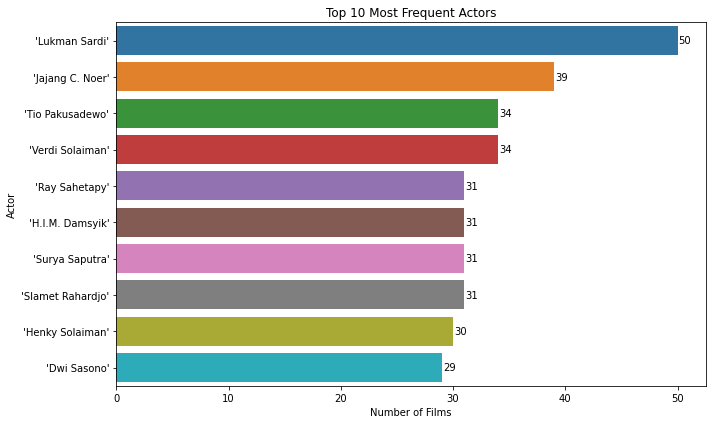

In [41]:
# 3.5 Most frequently appearing actor
df_actors = df['actors'].dropna().str.split(',').explode().str.strip()
top_actors = df_actors.value_counts().head(10)

plt.figure(figsize=(10,6))
ax = sns.barplot(x=top_actors.values, y=top_actors.index)
plt.title('Top 10 Most Frequent Actors')
plt.xlabel('Number of Films')
plt.ylabel('Actor')
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 0.1, p.get_y() + p.get_height()/2.,
            '{:.0f}'.format(width),
            ha="left", va="center")
plt.tight_layout()
plt.show()

---

### (3.5) Top 10 Most Frequent Actors
Lukman Sardi and Jajang C. Noer emerge as the actors who appear most frequently in films. Both are known as versatile actors with involvement in various film genres.

---

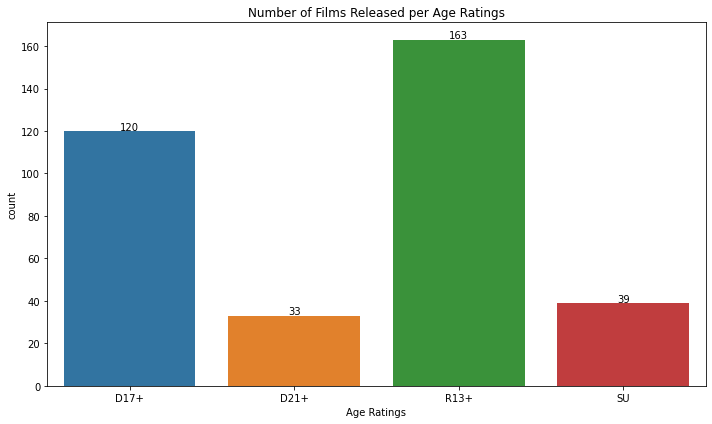

In [42]:
# 3.6 Distribution of films by age rating

plt.figure(figsize=(10,6))
ax = sns.countplot(data=df, x='rating', order=sorted(df['rating'].dropna().unique()))
plt.title('Number of Films Released per Age Ratings')
plt.xlabel('Age Ratings')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 0.5,
            '{:.0f}'.format(height),
            ha="center")

plt.tight_layout()
plt.show()

---

### (3.6) Number of Films Released per Age Ratings
The “D” (Adult) rating dominates, followed by “SU” (All Ages). Very few films are aimed at teenagers or children, indicating a lack of diversity in the audience segment.

---

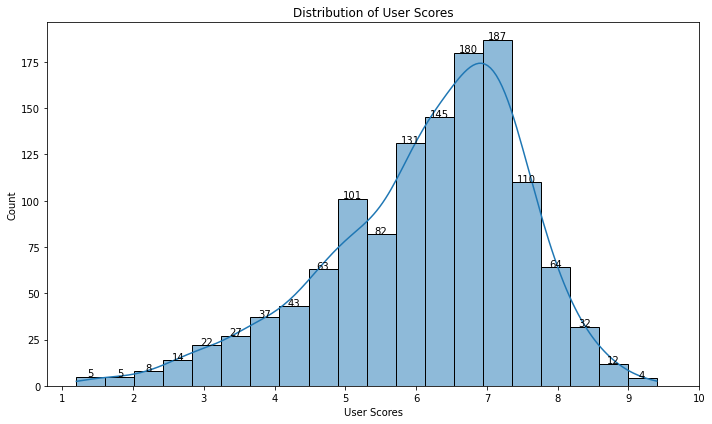

In [43]:
# 3.7 Film Score Distribution

plt.figure(figsize=(10,6))
ax = sns.histplot(df['users_rating'].dropna(), bins=20, kde=True)
plt.title('Distribution of User Scores')
plt.xlabel('User Scores')
plt.xticks(np.arange(1, 11, 1)) 
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 0.1,
            '{:.0f}'.format(height),
            ha="center")

plt.tight_layout()
plt.show()

---

### (3.7) Distribution of User Scores
Most films scored between 6 and 8, with a distribution resembling normal. Only a few films have extreme ratings (very low or very high).

---

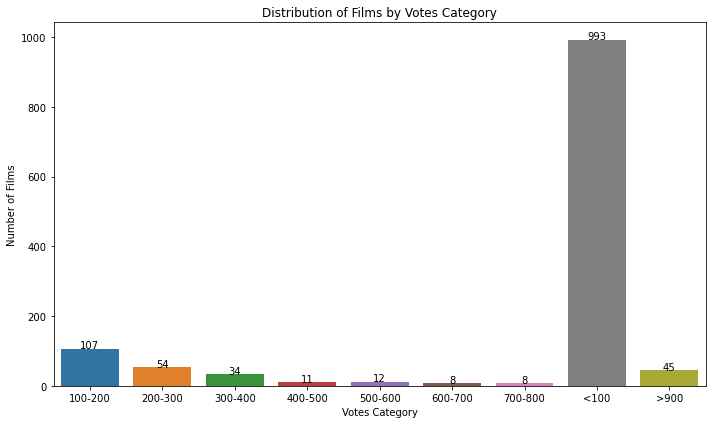

In [44]:
# 3.8 Distribution of films by votes category
plt.figure(figsize=(10,6))
ax = sns.countplot(data=df, x='votes_category', order=sorted(df['votes_category'].dropna().unique()))
plt.title('Distribution of Films by Votes Category')
plt.xlabel('Votes Category')
plt.ylabel('Number of Films')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 0.1,
            '{:.0f}'.format(height),
            ha="center")
plt.tight_layout()
plt.show()

---

### (3.8) Distribution of Films by Votes Category
The majority of films only received <100 user votes, indicating limited reach or lack of promotion for the film to garner high user ratings.

---

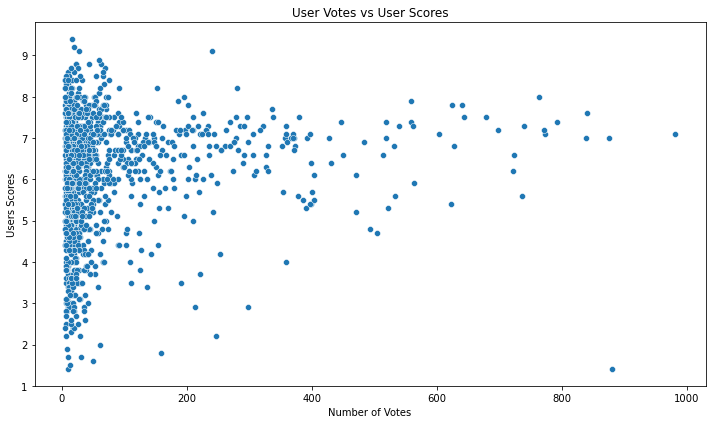

In [45]:
# 3.9 Votes vs User Scores
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='votes', y='users_rating')
plt.title('User Votes vs User Scores')
plt.xlabel('Number of Votes')
plt.ylabel('Users Scores')
plt.tight_layout()
plt.show()

---

### (3.9) User Votes vs User Scores
There is no strong correlation between the number of votes and user scores. Some films with few votes still have high ratings, and vice versa.

---

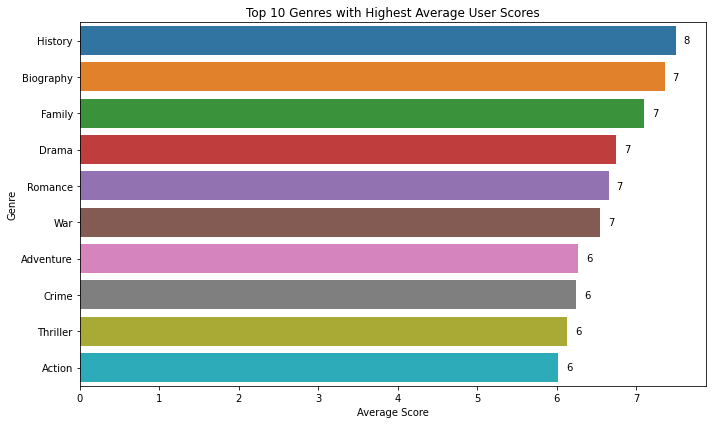

In [46]:
# 3.10 Average score per genre
genre_rating = df[['genre', 'users_rating']].dropna()
genre_rating = genre_rating.assign(genre=genre_rating['genre'].str.split(',')).explode('genre')
genre_rating['genre'] = genre_rating['genre'].str.strip()

mean_rating_genre = genre_rating.groupby('genre')['users_rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
ax = sns.barplot(x=mean_rating_genre.values, y=mean_rating_genre.index)
plt.title('Top 10 Genres with Highest Average User Scores')
plt.xlabel('Average Score')
plt.ylabel('Genre')
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 0.1, p.get_y() + p.get_height()/2.,
            '{:.0f}'.format(width),
            ha="left", va="center")
plt.tight_layout()
plt.show()

---

### (3.10) Top 10 Genres with Highest Average User Scores
Genres such as History, Biography, and Family received the highest average scores (>7), indicating a stronger quality or appeal of the story to the audience.

---

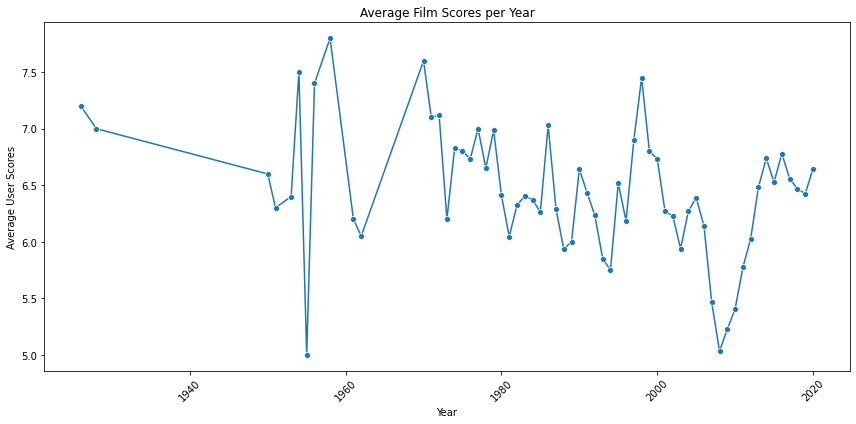

In [47]:
# 3.11 Average score per year
rating_year = df.groupby('year')['users_rating'].mean()

plt.figure(figsize=(12,6))
sns.lineplot(x=rating_year.index, y=rating_year.values, marker='o')
plt.title('Average Film Scores per Year')
plt.xlabel('Year')
plt.ylabel('Average User Scores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

---

### (3.11) Average Film Scores per Year
Fluctuations are seen from year to year, but do not show a clear upward or downward trend. Film scores vary by year, possibly influenced by production quality, theme, or popularity.

---

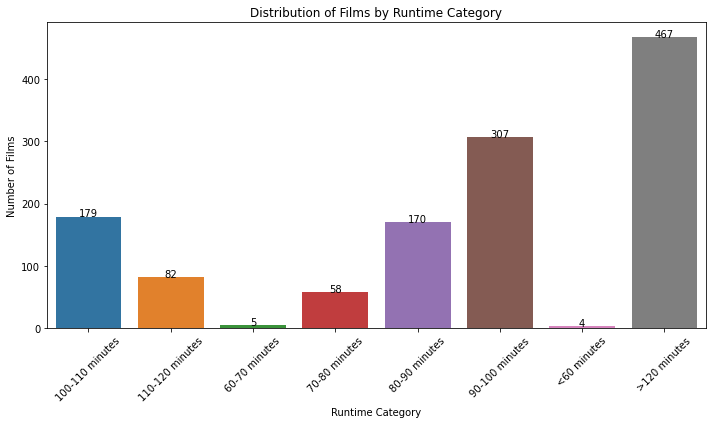

In [48]:
# 3.12 Film distribution by runtime category
plt.figure(figsize=(10,6))
ax = sns.countplot(data=df, x='runtime_category', order=sorted(df['runtime_category'].dropna().unique()))
plt.title('Distribution of Films by Runtime Category')
plt.xlabel('Runtime Category')
plt.ylabel('Number of Films')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 0.1,
            '{:.0f}'.format(height),
            ha="center")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

---

### (3.12) Distribution of Films by Runtime Category
Films with a duration of 90–120 minutes dominate, consistent with industry standards. Very few films are <70 minutes long.

---

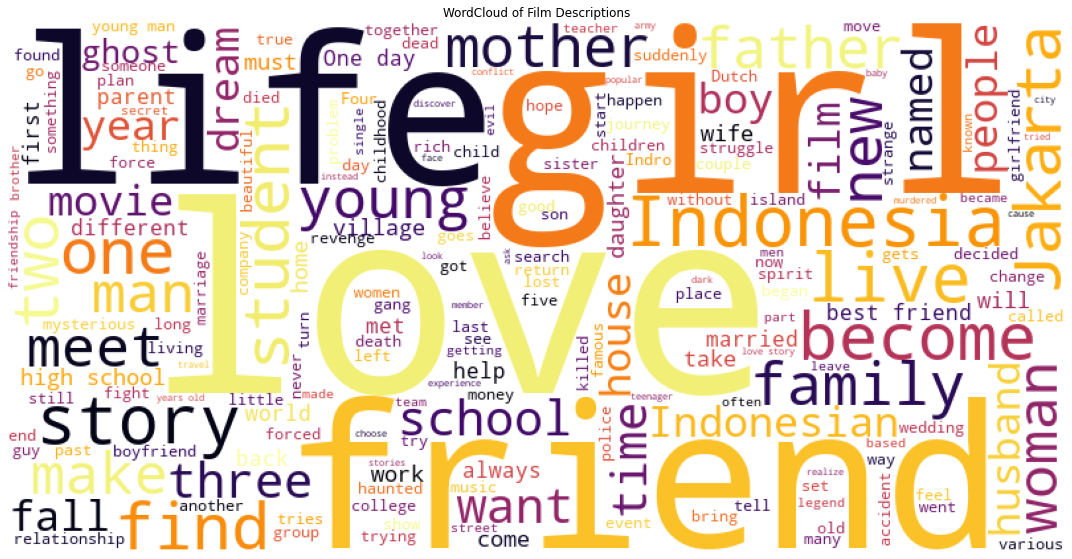

In [49]:
# 3.13 WordCloud of Movie Descriptions
text = " ".join(df['description'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='inferno').generate(text)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('WordCloud of Film Descriptions')
plt.tight_layout()
plt.show()

---

### (3.13) Wordcloud of Film Descriptions
Dominant words such as "love", "friend", "life", and "student" emphasize the focus of Indonesian film themes on social life, romance, and family.

---